In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [28]:
diamonds = pd.read_csv('./diamonds.csv')
crickets = pd.read_csv('./Cricket_chirps.csv')

In [29]:
crickets.head()
#chirps per second 
#X temperatire in 

,X,Y
0,88.599998,19
1,71.599998,16
2,93.300003,22
3,84.300003,17
4,80.599998,19


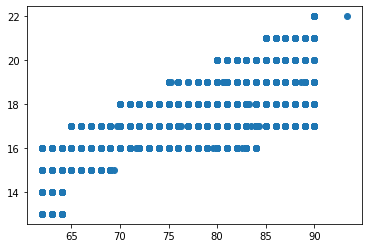

In [31]:
X = crickets['X']
y = crickets['Y']

plt.scatter(X,y)

In [30]:
crickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1499 non-null   float64
 1   Y       1499 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.5 KB


In [32]:
crickets.corr()

,X,Y
X,1.000000,0.729448
Y,0.729448,1.000000


In [33]:
X_with_constant = sm.add_constant(X)
simple_model = sm.OLS(endog = y, exog = X_with_constant).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1702.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          3.67e-249
Time:                        19:47:47   Log-Likelihood:                -2437.7
No. Observations:                1499   AIC:                             4879.
Df Residuals:                    1497   BIC:                             4890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.293     17.868      0.000       4.662       5.812
X              0.1580      0.004     41.260      0.000       0.150       0.165
==============================================================================
Omnibus:                      182.645   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.608
Skew:                          -0.066   Prob(JB):                     1.69e-11
Kurtosis:                       2.119   Cond. No.                         706.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumption #1: Linearity

The first assumption of simple linear regression is that there is a linear relationship between the independent and dependent variable. This assumption is important because, in order for our regression to be useful, we need a linear relationship. The easiest way to test this assumption is plotting your dependent and independent variable. If, the plot looks as though it follows a line, then it passes the linearity test and linear regression is a great model to show the relationship between the variables.

Below is a good example of linearity assumption being met

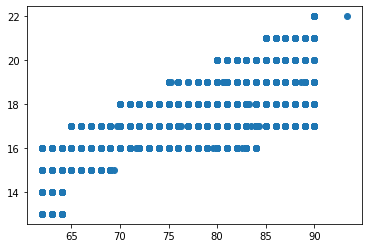

In [34]:
plt.scatter(X,y)

This is an example of our linearity assumption failing. The relationship between price and depth is not linear.

## Assumption 2: Normality

In linear regression, we want our errors to be normally distributed
this function prints a histogram of the residuals, idealy this histogram should be normally distributed

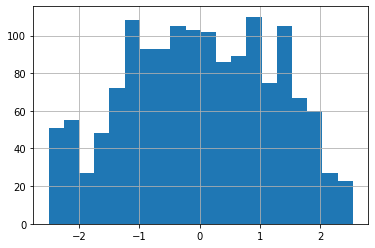

In [40]:
predictions = sm.OLS(endog=y, exog=X_with_constant).fit().predict(X_with_constant)
residuals = y - predictions
residuals.hist(bins=20);

## Assumption 3 : Homoskedasticity

In linear regression, we want the variance of our error terms to be constant

Text(0.5, 0.98, 'Residuals Vs. Predictions')

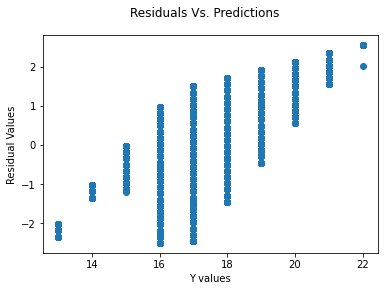

In [42]:
fig, ax = plt.subplots()
ax.scatter(y, residuals)
ax.set_xlabel('Y values')
ax.set_ylabel('Residual Values')
plt.suptitle('Residuals Vs. Predictions')


In [ ]:
## Assumption 4: Independence

In [43]:
dw = sm.stats.stattools.durbin_watson
dw(residuals)

1.962232159579161